## kmeans visualization

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from utils import Animator, classify_two_gauss_data

## original dataset

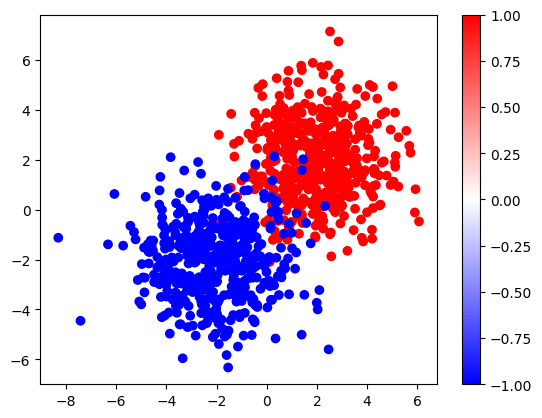

In [2]:
num_samples = 1000
noise = 0.3
x, y, label = classify_two_gauss_data(num_samples, noise)
plt.scatter(x, y, c=label, cmap=plt.cm.bwr)
plt.colorbar()
plt.show()

## kmeans clustering

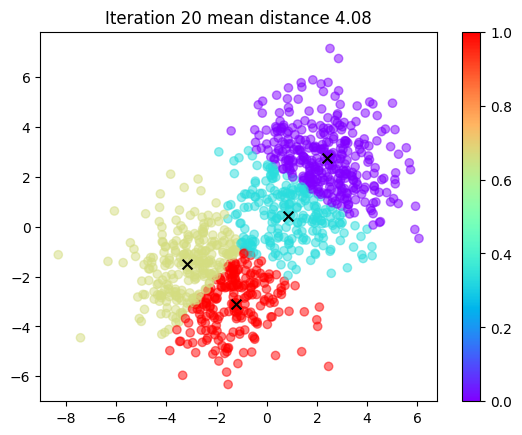

Final distance: 4.08
codebooks: tensor([[ 2.3939,  2.7572],
        [ 0.8551,  0.4197],
        [-3.1917, -1.4827],
        [-1.2336, -3.1086]])
codes: tensor([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0

In [21]:
X = torch.tensor(np.stack([x, y], axis=1), dtype=torch.float32)
v_clusters = 4
num_iterations = 20
idx = torch.randint(num_samples, (v_clusters,), dtype=torch.long)
codebooks = X[idx]
print(f'codebooks: {codebooks}')

# cmap = 'viridis'
cmap = 'rainbow'
ani = Animator()
ani.fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ani.ax)
# Plot the data and the cluster centers
for i in range(num_iterations):
    distance = torch.cdist(X, codebooks, p=2)
    codes = distance.argmin(dim=-1)
    # for-loop version
    # for k in range(v_clusters):
    #     codebooks[k] = X[codes == k].mean(dim=0)

    # matrix version
    # codes_onehot = F.one_hot(codes, v_clusters).float().T
    # codebooks = codes_onehot @ X / codes_onehot.sum(dim=-1, keepdim=True)
    ani.clear()
    ani.ax.scatter(x, y, c=codes, cmap=cmap, alpha=0.5)
    ani.ax.scatter(codebooks[:, 0], codebooks[:, 1], c='black',s = 50, marker='x')
    ani.ax.set_title(f'Iteration {i + 1} mean distance {distance.mean():.2f}')
    ani.render(0.1) 
print(f'Final distance: {distance.mean():.2f}')
print(f'codebooks: {codebooks}')
print(f'codes: {codes}')
ani.close()